Lab Work 1:
House Pricing Prediction Using Regression

Step 1: Data Analysis

In [2]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data
df = pd.read_csv('House Pricing.csv')

In [4]:
#display first 5 rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#display last 5 rows
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
#display columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
#display shape of dataset
df.shape

(545, 13)

In [8]:
#display information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
#display summary statistics
print(df.describe())

              price          area    bedrooms   bathrooms     stories   
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000  \
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


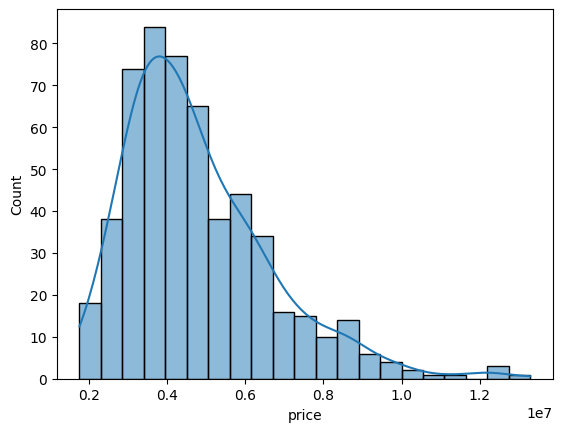

In [10]:
#histogram of target variable
sns.histplot(df['price'], kde=True)
plt.show()

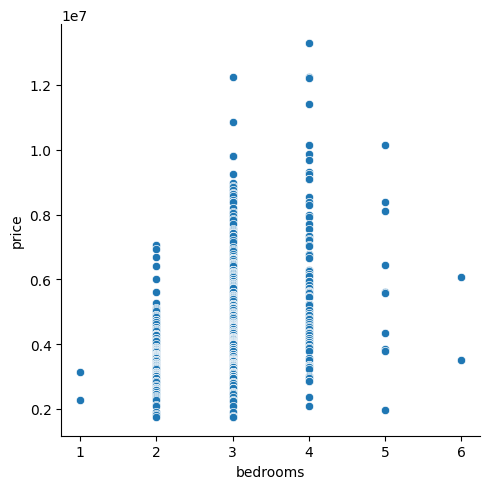

In [11]:
#example relation plot between two variables
sns.relplot(x='bedrooms', y='price',data=df)

Step 2: Data Preprocessing

In [12]:
#import dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
#Handling missing values: check for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [14]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].replace({'yes': True, 'no': False})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished


In [15]:
#Handling categorical variables: one-hot encoding
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=False)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,True,False,False
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,True,False,False
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,False,True,False
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,True,False,False
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,True,False,False


In [16]:
# Scaling/normalizing the numerical features
numerical_cols = ['area']

# Apply standard scaler to the numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,4,2,3,True,False,False,False,True,2,True,True,False,False
1,12250000,1.757010,4,4,4,True,False,False,False,True,3,False,True,False,False
2,12250000,2.218232,3,2,2,True,False,True,False,False,2,True,False,True,False
3,12215000,1.083624,4,2,2,True,False,True,False,True,3,True,True,False,False
4,11410000,1.046726,4,1,2,True,True,True,False,True,2,False,True,False,False


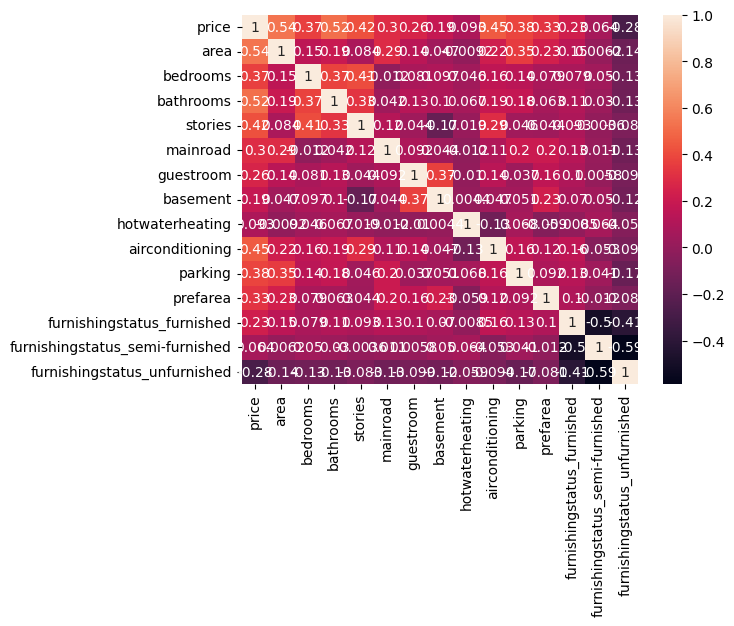

In [17]:
#Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:
#Split dataset into training and testing sets
X = df.drop(['price'],axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Display size of split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 14)
X_test shape: (109, 14)
y_train shape: (436,)
y_test shape: (109,)


1. X_train contains a randomly selected subset of the features for training the machine learning model. This subset is used to train the model and determine the relationships between the features and the target variable.
2. X_test contains the remaining subset of features that were not used in training. This subset is used to evaluate the performance of the trained machine learning model on new, unseen data.
3. y_train contains the target variable values that correspond to the features in the X_train subset. These values are used during the training phase to teach the model to predict the target variable.
4. y_test contains the target variable values that correspond to the features in the X_test subset. These values are used during the evaluation phase to assess the performance of the trained model in predicting the target variable on unseen data.

Step 3: Regression Model Development

In [20]:
#import dependencies
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge

Linear Regression

In [21]:
#Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
# Test the model
y_pred_lr = linear_reg.predict(X_test)

print('Training data r_squared: ' , linear_reg.score(X_train,y_train))
print('Test data r_squared: ', linear_reg.score(X_test, y_test))

Training data r_squared:  0.6859438988560158
Test data r_squared:  0.6529242642153177


In [23]:
np.array(y_test)

array([ 4060000,  6650000,  3710000,  6440000,  2800000,  4900000,
        5250000,  4543000,  2450000,  3353000, 10150000,  2660000,
        3360000,  3360000,  2275000,  2660000,  2660000,  7350000,
        2940000,  2870000,  6720000,  5425000,  1890000,  5250000,
        4193000, 12250000,  3080000,  5110000,  9800000,  2520000,
        6790000,  3500000,  6650000,  2940000,  3325000,  4200000,
        4900000,  3290000,  3500000,  2380000,  5495000,  3675000,
        6650000,  4907000,  3150000,  4480000,  6580000,  5740000,
        3003000,  1820000,  8400000,  2450000,  4270000,  4007500,
        3234000,  1750000,  9800000,  2100000,  4340000,  3045000,
        3850000,  3500000,  4753000,  3080000,  4550000,  6510000,
        6685000,  5110000,  4550000,  6650000,  3640000,  5600000,
        3780000,  6615000,  3220000,  6650000,  4690000,  4830000,
        6860000,  2233000,  7035000,  4165000,  6195000,  6510000,
        1890000,  8190000,  2660000,  4193000, 13300000,  9681

In [24]:
y_pred_lr

array([5164653.90033967, 7224722.29802166, 3109863.24240338,
       4612075.3272256 , 3294646.25725956, 3532275.09556558,
       5611774.56836475, 6368145.98732718, 2722856.95689986,
       2629405.61585783, 9617039.50315579, 2798087.30447888,
       3171096.76847064, 3394639.09125529, 3681088.65424275,
       5263187.74621486, 3035963.47612386, 4786122.8004005 ,
       4349551.9200572 , 3572362.09930451, 5774875.21395649,
       5886993.57919883, 2730836.19518458, 4727316.47323636,
       5244847.52716799, 7555324.21605602, 3220790.84680269,
       5191898.79934207, 8143726.91009782, 3398814.09825036,
       6490693.05027926, 3315105.90747811, 6708457.36761325,
       4201738.21071676, 3557571.06735186, 5836974.50478626,
       4808660.67448475, 4362878.73613262, 3191242.95701508,
       4596554.93225239, 4566042.8604841 , 3517779.52374149,
       7205844.79365835, 3983597.27861103, 3749338.70271055,
       4274731.09125895, 6757442.10783741, 4037320.43665851,
       3769334.90397125,

In [25]:
# Calculate evaluation metrics
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the evaluation metrics
print("Linear Regression")
print("Mean Absolute Error (MAE):", mae_lr)
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("R-squared (R2) Score:", r2_lr)

Linear Regression
Mean Absolute Error (MAE): 970043.4039201643
Mean Squared Error (MSE): 1754318687330.6677
Root Mean Squared Error (RMSE): 1324506.96009144
R-squared (R2) Score: 0.6529242642153177


Polynomial Regression

In [26]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
poly_reg.fit(X_poly_train, y_train)
linear_reg2 = LinearRegression()
linear_reg2.fit(X_poly_train, y_train)

LinearRegression()

In [27]:
# Transform the features into polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
pr_model = LinearRegression().fit(X_train_poly, y_train)

# Test the model
y_pred_pr = pr_model.predict(X_test_poly)

# Calculate evaluation metrics
mse_pr = mean_squared_error(y_test, y_pred_pr)
rmse_pr = np.sqrt(mse_pr)
r2_pr = r2_score(y_test, y_pred_pr)

# Print the evaluation metrics
print("Polynomial Regression")
print("Mean Squared Error (MSE):", mse_pr)
print("Root Mean Squared Error (RMSE):", rmse_pr)
print("R-squared (R2) Score:", r2_pr)

Polynomial Regression
Mean Squared Error (MSE): 2.3947357306174393e+31
Root Mean Squared Error (RMSE): 4893603713642370.0
R-squared (R2) Score: -4.737763279365069e+18


Support Vector Regression

In [28]:
#Support Vector Regression
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

SVR()

In [29]:
# Predict on test data
y_pred_svr = svr_reg.predict(X_test)

# Calculate evaluation metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print evaluation metrics
print("Support Vector Regression")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R-squared (R2) Score: {r2_svr}")

Support Vector Regression
Mean Squared Error (MSE): 5567930370139.423
Root Mean Squared Error (RMSE): 2359646.238345787
R-squared (R2) Score: -0.10156355511121995


Decision Tree Regression

In [30]:
# Initialize and fit the decision tree regression model
dtr_reg = DecisionTreeRegressor(random_state=42)
dtr_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [31]:
# Initialize and fit the decision tree regression model
dtr_reg = DecisionTreeRegressor(random_state=42)
dtr_reg.fit(X_train, y_train)

# Make predictions on testing data
y_pred_dtr = dtr_reg.predict(X_test)

# Calculate evaluation metrics
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

# Print the evaluation metrics
print("Decision Tree Regression")
print("Mean Squared Error (MSE):", mse_dtr)
print("Root Mean Squared Error (RMSE):", rmse_dtr)
print("R-squared (R2) Score:", r2_dtr)

Decision Tree Regression
Mean Squared Error (MSE): 2997569493119.266
Root Mean Squared Error (RMSE): 1731349.0385012683
R-squared (R2) Score: 0.40695858460408285


Random Forest Regression

In [32]:
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=71, criterion="absolute_error",random_state=141,oob_score=True,min_samples_split=4,max_depth=10)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_split=4, n_estimators=71, oob_score=True,
                      random_state=141)

In [33]:
# Make predictions on the testing data
y_pred_rf = rf_reg.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Regression")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2) Score:", r2_rf)

Random Forest Regression
Mean Squared Error (MSE): 1866138982739.9458
Root Mean Squared Error (RMSE): 1366066.9759349085
R-squared (R2) Score: 0.6308016524087431


Gradient Boosting Regression

In [34]:
# Train the model
gb_reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50)

In [35]:
# Make predictions on the test data
y_pred_gb = gb_reg.predict(X_test)

# Evaluate the model using appropriate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the evaluation metrics
print("Gradient Boosting Regression")
print("Mean Squared Error (MSE):", mse_gb)
print("Root Mean Squared Error (RMSE):", rmse_gb)
print("R-squared (R2) Score:", r2_gb)

Gradient Boosting Regression
Mean Squared Error (MSE): 1800285987588.4526
Root Mean Squared Error (RMSE): 1341747.3635481654
R-squared (R2) Score: 0.6438300587700791


In [36]:
# Import the necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameter grid to search
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Create a GridSearchCV object
gb_reg = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(gb_reg, param_grid_gb, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the GridSearchCV object to the training data
grid_search_gb.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search_gb.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


Lasso Regression

In [37]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [38]:
# Evaluate the model with testing data
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression")
print("Mean Squared Error (MSE):", mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)
print("R-squared (R2) Score:", r2_score_lasso)

Lasso Regression
Mean Squared Error (MSE): 1754319069776.074
Root Mean Squared Error (RMSE): 1324507.1044641754
R-squared (R2) Score: 0.6529241885520292


Ridge Regression

In [39]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1)

In [40]:
y_pred = ridge_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1757034478013.0522
Root Mean Squared Error (RMSE): 1325531.7717855927
R-squared (R2) Score: 0.6523869701329295


Elastic Net Regression

In [41]:
# Create Elastic Net Regression model
enet_reg = ElasticNet(alpha=0.01, l1_ratio=0.5)

# Train the model on the training data
enet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [42]:
# Make predictions on the testing data
y_pred = enet_reg.predict(X_test)

# Evaluate the model using appropriate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Elastic Net Regression")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Elastic Net Regression
Mean Squared Error (MSE): 1760271803246.8022
Root Mean Squared Error (RMSE): 1326752.3518904357
R-squared (R2) Score: 0.6517464952604947


Bayesian Regression

In [43]:
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train, y_train)

BayesianRidge()

In [44]:
# Evaluate the model using the testing data
y_pred_bayesian = bayesian_reg.predict(X_test)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
rmse_bayesian = np.sqrt(mse_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

print("Bayesian Regression")
print("Mean Squared Error (MSE):", mse_bayesian)
print("Root Mean Squared Error (RMSE):", rmse_bayesian)
print("R-squared (R2) Score:", r2_bayesian)

Bayesian Regression
Mean Squared Error (MSE): 5145176851282.052
Root Mean Squared Error (RMSE): 2268298.228029562
R-squared (R2) Score: -0.017925679238026904


Step 4: Model Evaluation

In [45]:
#import dependencies
import matplotlib.pyplot as plt

In [46]:
# Fit the linear regression model on the training set
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict house prices on the test set using the linear regression model
y_pred_lr = linear_reg.predict(X_test)

In [48]:
# Evaluate the linear regression model using evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

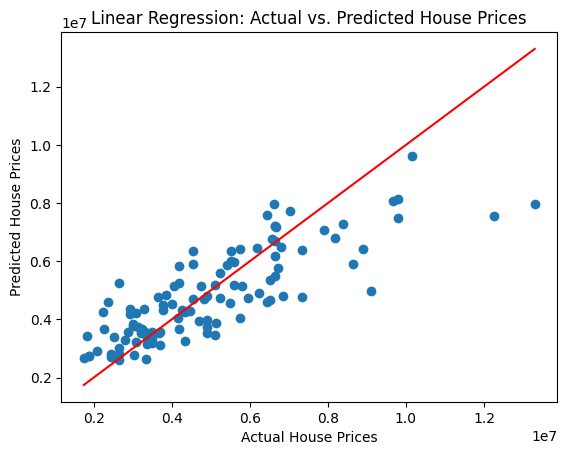

In [49]:
# Visualize the predicted vs. actual house prices using a scatter plot
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Linear Regression: Actual vs. Predicted House Prices")

# Draw the line of best fit
x = np.linspace(min(y_test), max(y_test), 100)
y = x
plt.plot(x, y, color='red')

plt.show()

In [50]:
# Print the evaluation metrics
print("Linear Regression Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("R-squared (R2):", r2_lr)

Linear Regression Evaluation Metrics:
Mean Squared Error (MSE): 1754318687330.6677
Root Mean Squared Error (RMSE): 1324506.96009144
R-squared (R2): 0.6529242642153177
